In [1]:
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### import X images array, y labels array 
(Due to Ram Limitations on Kaggle Notebook, saved and loaded after Scaling and OHE)

Transformations: 
X - (Array of images - Spectograms (See Data-Processing Notebook), reshaped to (224,224,3))
y - array of labels

Step 1: Arrays were shuffeled using - np.random.permutation
Step 2: Train_Test_split (stratify=ys, test_size=0.2, random_state=42)
Step 3: X-arrays were scaled - X(train/test).astype("float32")/255
Step 4: y-arrays OHE - keras.utils.to_categorical(y_train/y_test, 6)


In [2]:
X_train_scaled = np.load('../input/arrays-224/X_train_scaled.npy')
X_test_scaled = np.load('../input/arrays-224/X_test_scaled.npy')
y_train_ohe = np.load('../input/arrays-224/y_train_ohe.npy')
y_test_ohe = np.load('../input/arrays-224/y_test_ohe.npy')

In [3]:
X_train_scaled.shape, X_test_scaled.shape, y_train_ohe.shape, y_test_ohe.shape

((5953, 224, 224, 3), (1489, 224, 224, 3), (5953, 6), (1489, 6))

### Compile Model

In [4]:
# Model / data parameters
num_classes = 6
input_shape = (224, 224, 3)

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

2022-06-08 21:56:11.609170: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 21:56:11.638645: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 21:56:11.639364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 21:56:11.640484: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

In [7]:
batch_size = 8
epochs = 50

In [8]:
# set Evaluation metric
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Train Model

In [9]:
#  Early stopping:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0005,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

In [10]:
hist = model.fit(X_train_scaled, y_train_ohe,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_split=0.1,
                 callbacks = [early_stop])

2022-06-08 21:56:12.754676: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3225513984 exceeds 10% of free system memory.
2022-06-08 21:56:16.310281: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3225513984 exceeds 10% of free system memory.
2022-06-08 21:56:18.640147: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-06-08 21:56:20.050516: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


670/670 [==============================] - ETA: 0s - loss: 1.5470 - accuracy: 0.3524

2022-06-08 21:56:33.808190: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 358858752 exceeds 10% of free system memory.
2022-06-08 21:56:34.265368: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 358858752 exceeds 10% of free system memory.


670/670 [==============================] - 17s 14ms/step - loss: 1.5470 - accuracy: 0.3524 - val_loss: 1.4668 - val_accuracy: 0.4530
Epoch 2/50
670/670 [==============================] - 9s 13ms/step - loss: 1.3965 - accuracy: 0.4351 - val_loss: 1.4193 - val_accuracy: 0.4564
Epoch 3/50
670/670 [==============================] - 9s 13ms/step - loss: 1.3315 - accuracy: 0.4706 - val_loss: 1.4766 - val_accuracy: 0.4111
Epoch 4/50
670/670 [==============================] - 9s 13ms/step - loss: 1.2727 - accuracy: 0.5025 - val_loss: 1.3301 - val_accuracy: 0.4950
Epoch 5/50
670/670 [==============================] - 9s 13ms/step - loss: 1.2427 - accuracy: 0.5199 - val_loss: 1.3586 - val_accuracy: 0.4849
Epoch 6/50
670/670 [==============================] - 9s 13ms/step - loss: 1.2062 - accuracy: 0.5384 - val_loss: 1.3263 - val_accuracy: 0.4866
Epoch 7/50
670/670 [==============================] - 9s 13ms/step - loss: 1.1736 - accuracy: 0.5449 - val_loss: 1.2638 - val_accuracy: 0.5352
Epoch 8/5

### Evaluate Model

In [11]:
# evaluate model - Test
score = model.evaluate(X_test_scaled, y_test_ohe, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2022-06-08 22:01:46.770311: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 896544768 exceeds 10% of free system memory.


47/47 [==============================] - 1s 18ms/step - loss: 1.0926 - accuracy: 0.5843
Test loss: 1.092581033706665
Test accuracy: 0.584284782409668


In [25]:
model.save("cnn_final.h5")

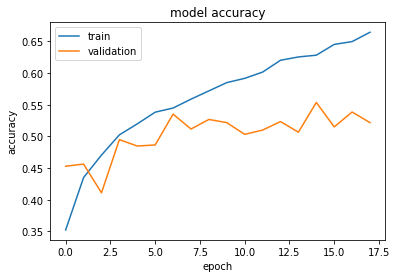

In [12]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

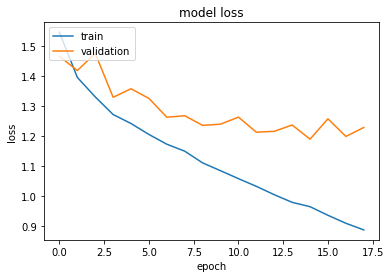

In [13]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
predictions = []
y_true = []

In [16]:
X_test_scaled.shape, y_test_ohe.shape

((1489, 224, 224, 3), (1489, 6))

In [17]:
for item in y_test_ohe:
    item_true = np.argmax(item) 
    y_true.append(item_true)

In [18]:
for i in range(len(X_test_scaled)):
    y_ohe = model.predict(X_test_scaled[i].reshape(-1, 224, 224, 3))
    y_pred = np.argmax(y_ohe)
    predictions.append(y_pred)

In [19]:
len(predictions), len(y_true)

(1489, 1489)

In [20]:
pred_array = np.array(predictions)
y_true_array = np.array(y_true)

In [21]:
pred_array.shape, y_true_array.shape

((1489,), (1489,))

In [22]:
cm = confusion_matrix(y_true, pred_array)

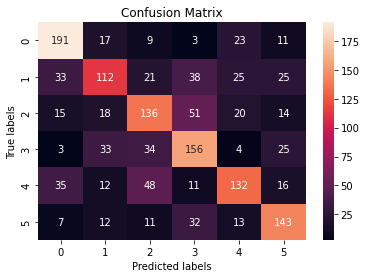

In [23]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
 {'ANG': 0, 'DIS': 1, 'FEA': 2, 'SAD': 3, 'HAP': 4, 'NEU': 5}